# Województwo mazowieckie
## Analiza ogłoszeń sprzedaży mieszkań

In [163]:
#!pip install wordcloud
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt

  Using cached wordcloud-1.8.2.2-cp38-cp38-win_amd64.whl (152 kB)


In [2]:
title_list = []
location_list = []
price_list = []
area_list = []

def clear_lists():
    title_list = []
    location_list = []
    price_list = []
    area_list = []

def parse_page(number):
    print(f'pracuję nad stroną nr: {number}')
    page = get(f'{url}&page={number}')
    #page = get(url)
    bs = BeautifulSoup(page.content)
    for offer in bs.find_all(attrs={'data-cy': 'l-card'}):
        footer = offer.find('p',class_='css-p6wsjo-Text eu5v0x0').get_text()
        location = footer.split()[0]
        location.replace(',','')
        #print(footer)  #- to jest cena
        price = parse_price(offer.find('p',class_='css-1q7gvpp-Text eu5v0x0').get_text())
        #price = footer.split()[0]
        title = offer.find('h6', class_='css-1pvd0aj-Text eu5v0x0').get_text()
        area = float(offer.find('div',class_= 'css-1kfqt7f').get_text().split()[0].strip().replace(',','.').replace('m2',''))
        title_list.append(title)
        location_list.append(location)
        price_list.append(price)
        area_list.append(area)

In [3]:
def parse_price(price):
    return float(price.replace(' ','').replace('zł','').replace('donegocjacji','').replace(',','.'))

def parse_city(df):
    grodzisk = df["city"] == "Grodzisk"
    df.loc[grodzisk, "city"] = "Grodzisk Mazowiecki"
    df.loc[df['city'] == "Warszawa,", 'city'] = "Warszawa"
    df.loc[df['city'] == "Bielsk", 'city'] = "Bielsk Podlaski"

In [4]:
## tworzenie ramki danych i zapis danych do pliku
def create_frame(nr):
    matrix = np.matrix([title_list,location_list, price_list,area_list])
    df = pd.DataFrame(data=matrix)
    df = df.T
    df = df.rename(columns={0:'title', 1:'city', 2:'price', 3:'area'})
    df['rooms'] = nr
    df.price=df.price.astype(float)
    df.area=df.area.astype(float)
    df['cena m2']=df['price']/df['area'].round(2)
    parse_city(df)
    return df

## Dla mieszkań jednopokojowych ##

In [5]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/mazowieckie/?search%5Bfilter_enum_rooms%5D%5B0%5D=one'

clear_lists()
for page in range(1,17):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_1 = create_frame(1)
df_1.to_json("./mieszkania_OLX_1_rooms_maz.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10
pracuję nad stroną nr: 11
pracuję nad stroną nr: 12
pracuję nad stroną nr: 13
pracuję nad stroną nr: 14
pracuję nad stroną nr: 15
pracuję nad stroną nr: 16


In [29]:
df_1.city.unique()

array(['Płock', 'Warszawa,', 'Radom', 'Ząbki', 'Góra', 'Garwolin',
       'Milanówek', 'Wołomin', 'Konstancin-Jeziorna', 'Józefosław',
       'Siedlce', 'Legionowo', 'Piaseczno', 'Grodzisk', 'Sokołów',
       'Żyrardów', 'Piastów', 'Zamienie', 'Pruszków', 'Radzymin',
       'Nasielsk', 'Gostynin', 'Kobyłka', 'Ceranów', 'Ożarów', 'Zwoleń',
       'Jabłonna', 'Zegrze', 'Pionki', 'Warszawa', 'Sulejówek', 'Grójec',
       'Pass', 'Wróblewko', 'Ostrołęka', 'Kozienice', 'Radzików', 'Mińsk',
       'Pułtusk', 'Wyszków', 'Sochaczew', 'Michrów', 'Warka', 'Mława',
       'Nowy', 'Łomianki', 'Wieliszew', 'Iłża', 'Wielogóra', 'Otwock',
       'Ostrów', 'Płońsk', 'Ciechanów', 'Tarczyn'], dtype=object)

## Dla mieszkań dwupokojowych ##

In [7]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/mazowieckie/?search%5Bfilter_enum_rooms%5D%5B0%5D=two'

clear_lists()
for page in range(1,26):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_2 = create_frame(2)
df_2.to_json("./mieszkania_OLX_2_rooms_maz.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10
pracuję nad stroną nr: 11
pracuję nad stroną nr: 12
pracuję nad stroną nr: 13
pracuję nad stroną nr: 14
pracuję nad stroną nr: 15
pracuję nad stroną nr: 16
pracuję nad stroną nr: 17
pracuję nad stroną nr: 18
pracuję nad stroną nr: 19
pracuję nad stroną nr: 20
pracuję nad stroną nr: 21
pracuję nad stroną nr: 22
pracuję nad stroną nr: 23
pracuję nad stroną nr: 24
pracuję nad stroną nr: 25


## Dla mieszkań trzypokojowych ##

In [8]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/mazowieckie/?search%5Bfilter_enum_rooms%5D%5B0%5D=three'

clear_lists()
for page in range(1,26):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_3 = create_frame(3)
df_3.to_json("./mieszkania_OLX_3_rooms_maz.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10
pracuję nad stroną nr: 11
pracuję nad stroną nr: 12
pracuję nad stroną nr: 13
pracuję nad stroną nr: 14
pracuję nad stroną nr: 15
pracuję nad stroną nr: 16
pracuję nad stroną nr: 17
pracuję nad stroną nr: 18
pracuję nad stroną nr: 19
pracuję nad stroną nr: 20
pracuję nad stroną nr: 21
pracuję nad stroną nr: 22
pracuję nad stroną nr: 23
pracuję nad stroną nr: 24
pracuję nad stroną nr: 25


## Dla mieszkań z czterema i więcej pokojami

In [99]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/mazowieckie/?search%5Bfilter_enum_rooms%5D%5B0%5D=four'

clear_lists()
for page in range(1,23):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_4 = create_frame(4)
df_4.to_json("./mieszkania_OLX_4_rooms_maz.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10
pracuję nad stroną nr: 11
pracuję nad stroną nr: 12
pracuję nad stroną nr: 13
pracuję nad stroną nr: 14
pracuję nad stroną nr: 15
pracuję nad stroną nr: 16
pracuję nad stroną nr: 17
pracuję nad stroną nr: 18
pracuję nad stroną nr: 19
pracuję nad stroną nr: 20
pracuję nad stroną nr: 21
pracuję nad stroną nr: 22


## Wczytywanie zbiorów i łączenie danych w jedną ramkę danych

In [106]:
df_1 = pd.read_json("./mieszkania_OLX_1_rooms_maz.json")
df_2 = pd.read_json("./mieszkania_OLX_2_rooms_maz.json")
df_3 = pd.read_json("./mieszkania_OLX_3_rooms_maz.json")
df_4 = pd.read_json("./mieszkania_OLX_4_rooms_maz.json")
df_concat= pd.concat([df_1,df_2,df_3,df_4], sort=False)
df_concat.rename(columns={"cena m2": "square meter price"}, inplace=True)
df_1.rename(columns={"cena m2": "square meter price"})
df_2.rename(columns={"cena m2": "square meter price"})
df_3.rename(columns={"cena m2": "square meter price"})
df_4.rename(columns={"cena m2": "square meter price"})

,title,city,price,area,rooms,square meter price
0,"Mieszkanie na sprzedaż 4 pokoje, Pruszków OKAZJA!",Pruszków,678680.0,88.00,4,7712.272727
1,Mieszkanie 62m²⭐Po remoncie⭐4pokoje⭐Winda⭐Balkon,Pruszków,592000.0,62.00,4,9548.387097
2,Mieszkanie na sprzedaż,Wyszogród,295000.0,71.00,4,4154.929577
3,"Bezpo. 4-pok,na wynajem lub dla rodzin, przy p...",Warszawa,1044000.0,67.37,4,15496.511801
4,"Nowe Mieszkanie 72,83m2, 4 pok. z 2022r. 3p. w...",Siedlce,633000.0,72.83,4,8691.473294
...,...,...,...,...,...,...
1062,Nowoczesny Dom~Bezczynszowy~Podwyższony Standa...,Radom,439000.0,120.00,4,3658.333333
1063,GOTOWE 71m2 z garażem i boksem w cenie - bez PCC,Warszawa,674834.0,71.38,4,9454.104791
1064,"Apartament 124,38M2 z ogrodem 230 m2 - WARSZA...",Warszawa,1250000.0,124.38,4,10049.847242
1065,Mieszkanie Warszawa Wawer Trakt Lubelski stan ...,Warszawa,585000.0,90.00,4,6500.000000


## Categorization of rooms column

In [107]:
#removing columns with text like title and city
df_numeric = df_concat.drop(columns=['title', 'city'])
df_numeric.rename(columns={"cena m2": "square meter price"}, inplace=True)
df_numeric = df_numeric.astype({'rooms': 'object'}, copy=False)
#df_numeric['rooms'].astype(str)
df_numeric2 = pd.get_dummies(df_numeric)
# #df_numeric2.sample(n=5)
# df_numeric = df_numeric.drop(columns=['rooms'], axis=1)
# df_numeric = df_numeric + df_numeric2
# df_numeric.info()
# df_numeric2.sample(4)

In [108]:
df_numeric2.sample(20)

,price,area,square meter price,rooms_1,rooms_2,rooms_3,rooms_4
440,450000.0,29.12,15453.296703,1,0,0,0
2409,530000.0,75.00,7066.666667,0,0,1,0
363,699900.0,31.00,22577.419355,0,1,0,0
60,335000.0,28.00,11964.285714,1,0,0,0
1291,528000.0,33.00,16000.000000,0,1,0,0
2093,545000.0,54.00,10092.592593,0,0,1,0
2516,180000.0,53.07,3391.746750,0,0,1,0
996,495000.0,33.00,15000.000000,0,0,1,0
197,1149000.0,109.07,10534.519116,0,0,0,1
747,350000.0,30.00,11666.666667,1,0,0,0


In [109]:
df_numeric2.corr(method="spearman").style.background_gradient(cmap="coolwarm")

,price,area,square meter price,rooms_1,rooms_2,rooms_3,rooms_4
price,1.000000,0.647514,0.496057,-0.220767,-0.170655,0.000032,0.406044
area,0.647514,1.000000,-0.262338,-0.373441,-0.261799,0.048664,0.585269
square meter price,0.496057,-0.262338,1.000000,0.118643,0.064499,-0.027755,-0.145288
rooms_1,-0.220767,-0.373441,0.118643,1.000000,-0.218008,-0.319432,-0.146067
rooms_2,-0.170655,-0.261799,0.064499,-0.218008,1.000000,-0.578707,-0.264626
rooms_3,0.000032,0.048664,-0.027755,-0.319432,-0.578707,1.000000,-0.387738
rooms_4,0.406044,0.585269,-0.145288,-0.146067,-0.264626,-0.387738,1.000000


### As we can see there is quite strong correlation between (price and area) and (area and rooms_4)

array([<AxesSubplot:title={'center':'area'}, xlabel='[price]'>,
       <AxesSubplot:title={'center':'rooms_1'}, xlabel='[price]'>,
       <AxesSubplot:title={'center':'rooms_2'}, xlabel='[price]'>,
       <AxesSubplot:title={'center':'rooms_3'}, xlabel='[price]'>,
       <AxesSubplot:title={'center':'rooms_4'}, xlabel='[price]'>,
       <AxesSubplot:title={'center':'square meter price'}, xlabel='[price]'>],
      dtype=object)

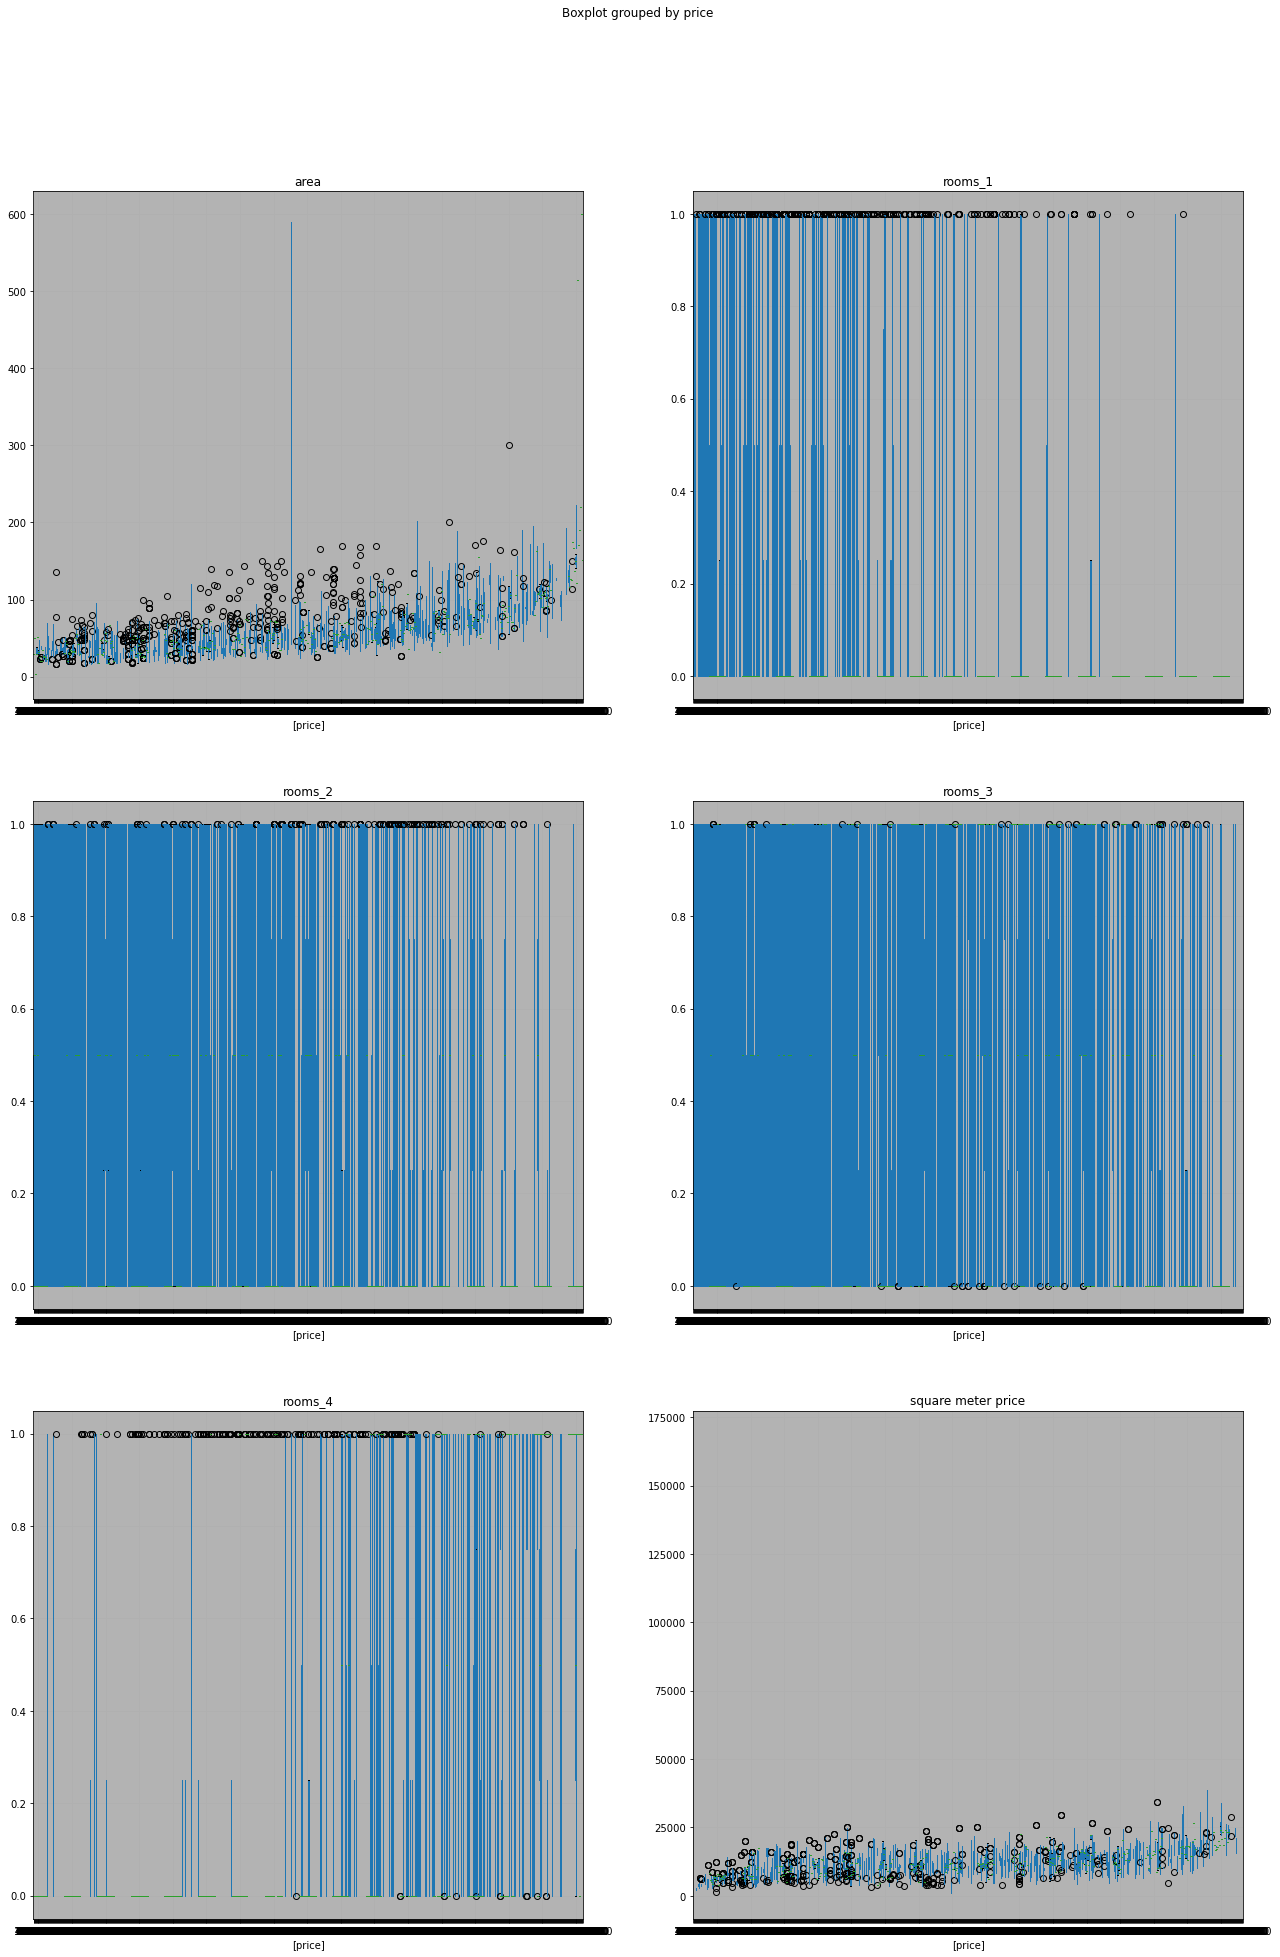

In [114]:
fig, ax = plt.subplots(3, 2, sharey=False, figsize=(21.0, 32.0)) #sharey=False - każdy wykres będzie miał swoją skalę na osi y
df_numeric2.boxplot(by="price", ax=ax.flatten(),#[:-2],
                        layout=(3, 2))

In [53]:
#sprawdzanie rozkładu dla 4 pokojowych, gdyż średnia cena dla tych mieszkań wyszła ponad 60 tyś.
def price_area_scatter(df):
    plt.figure(figsize = (12, 8)) # size of the figure
    scatter = plt.scatter(df['area'],
                df['price']/1000, 
                alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
                c = df['rooms'], # additional third feature
                cmap = 'viridis') #color map for the third variable
    # add and format additional elements, such as legends, titles and axis labels
    plt.legend(*scatter.legend_elements(),
               loc = "upper left",
               title = "ilość pokoi")
    plt.title("Relation between area and price/Relacja pomiędzy powierzchnią i ceną, mazowieckie", 
              fontsize = 14, 
              weight = "bold")
    plt.xlabel("area in square meters / powierzchnia m2", weight = "bold")
    plt.ylabel("price in thousand PLN / cena w tyś zł.")
    plt.show()

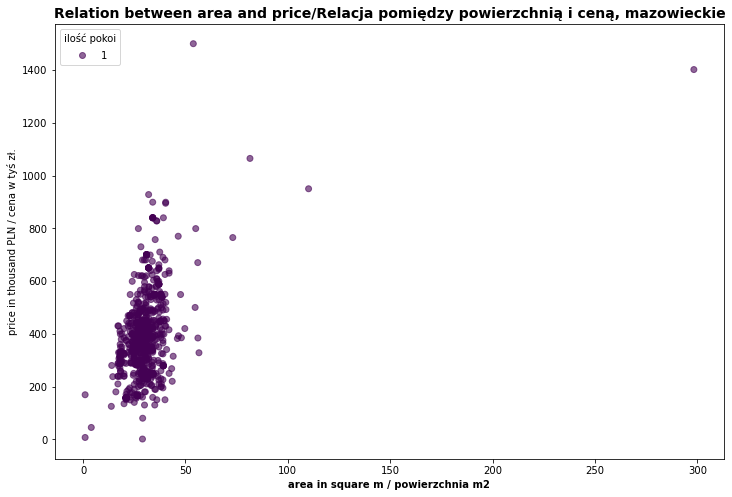

In [8]:
price_area_scatter(df_1)

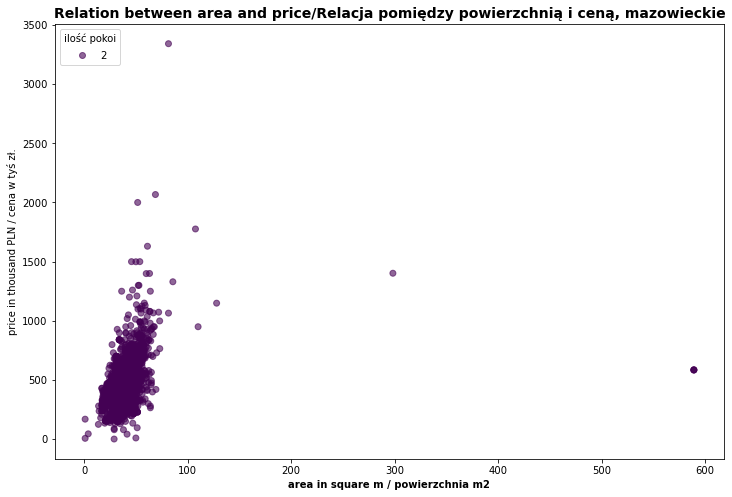

In [103]:
price_area_scatter(df_2)

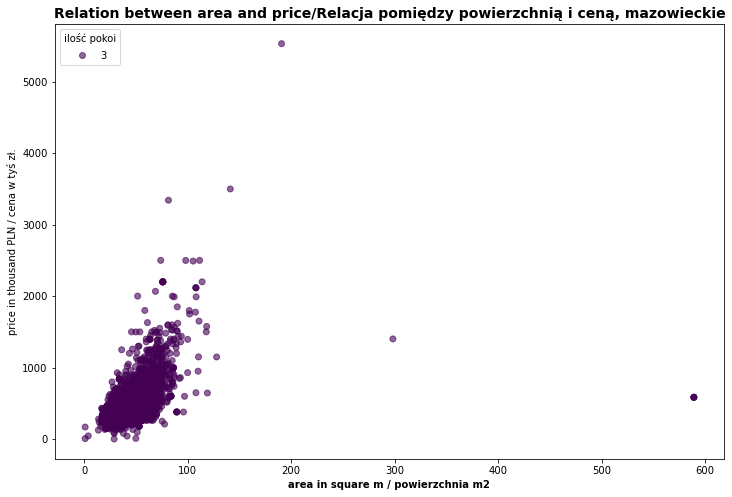

In [104]:
price_area_scatter(df_3)

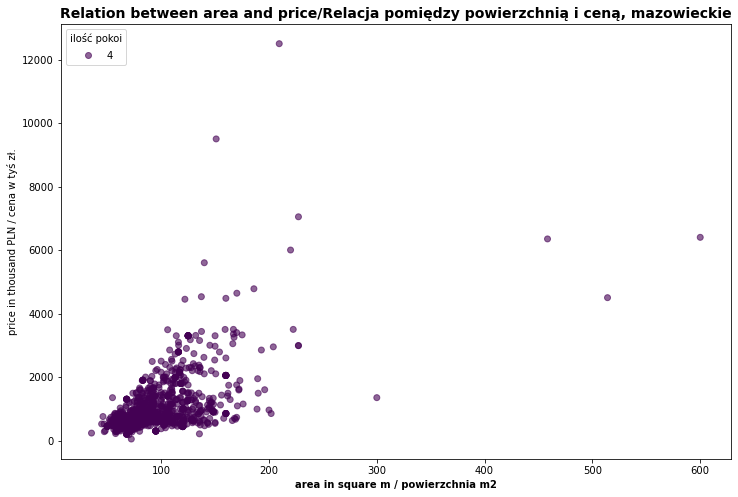

In [107]:
price_area_scatter(df_4)

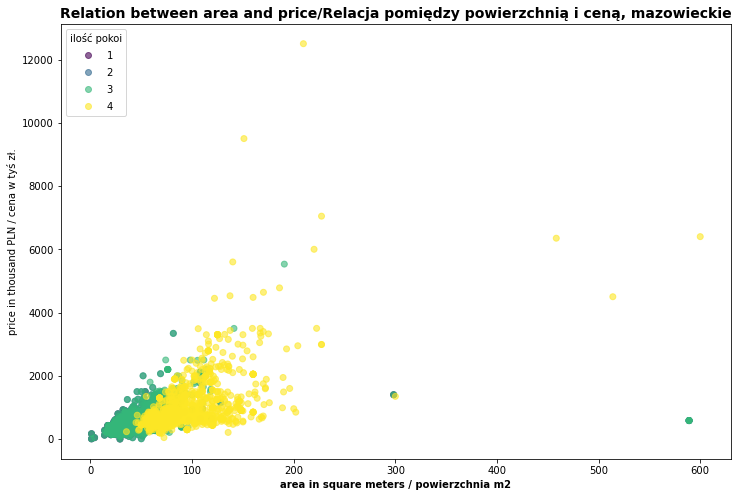

In [116]:
price_area_scatter(df_concat)

In [12]:
# df_concat.describe()
# df_concat.sample(30)

,title,city,price,area,rooms,cena m2
3209,Nowe/Gotowe mieszkanie -Bezpośrednio,"Warszawa,",565000.0,52.00,3,10865.384615
478,Mieszkanie 1 pokojowe Mokotów Biały Kamień Eko...,"Warszawa,",840000.0,34.00,1,24705.882353
2464,"Mieszkanie 3 pok. 47 m2, Sadyba ul. Konstancińska","Warszawa,",625000.0,47.20,3,13241.525424
1443,NOWA / kawalerka 27m2 / CENTRUM / 2 pokoje / p...,Płock,215000.0,27.00,2,7962.962963
1575,"Klimatyczne, 2-pokojowe, przy Targowej w II linii","Warszawa,",827000.0,61.00,4,13557.377049
44,Sprzedam kawalerkę przy Starówce,"Warszawa,",469000.0,22.00,3,21318.181818
3181,piękne 3 pokojowe mieszkanie w WAWRZE,"Warszawa,",629000.0,70.00,4,8985.714286
3240,Mieszkanie 3 pokoje Radom,Radom,600000.0,84.00,3,7142.857143
1626,2 pokoje w zieleni - blisko metra,"Warszawa,",549000.0,37.65,3,14581.673307
2105,taras 28 m2 / panorama / jasne / ciche / garaż,"Warszawa,",1360000.0,93.26,4,14582.886554


## Wykresy

In [54]:
from matplotlib.ticker import PercentFormatter

total_count = df_concat['title'].count()
total_count

7085

In [55]:
df_concat.loc[df_concat['city'] == "Warszawa,", 'city'] = "Warszawa"

In [57]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7085 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    7085 non-null   object 
 1   city     7085 non-null   object 
 2   price    7085 non-null   float64
 3   area     7085 non-null   float64
 4   rooms    7085 non-null   int64  
 5   cena m2  7085 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB


In [127]:
df_rooms = df_concat.groupby(by=['rooms'])["square meter price"].agg(["mean","count"])  
df_rooms.columns = (["Average","Count"])
df_rooms['Avemshare'] = df_rooms.Count / total_count  #average market share - średni udział w rynku
#df_chart = df_chart.loc[df_chart['Liczba'] > 3]
df_rooms

,Average,Count,Avemshare
rooms,,,
1,13568.245090,761,0.107410
2,12351.033633,2006,0.283133
3,11785.397176,3251,0.458857
4,10803.382469,1067,0.150600


In [124]:
import matplotlib.pyplot as plt

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')
        
def combo_visual(df):
    fig, ax = plt.subplots(figsize = (18, 7))
    x = df.index.astype(str)
    y = df["Average"]
    #creating and styling the bar chart
    ax.bar(df.index.astype(str) ,
           df["Average"],
           color = "#000959")
    ax.set_ylabel("Averege price for square meter / Średnia cena m2", 
                  weight = "bold")
    ax.tick_params(axis = "y", 
                   width = 2, 
                   labelsize = "large")
    ax.tick_params(axis = "x", 
                   rotation = 60)
    ax1 = ax.twinx()
    #changing the secondary y-axis to display percentages on a scale from 0% to 100%
    ax1.set_ylim(0, 1)
    ax1.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))
    #creating and styling the line chart
    ax1.plot(df.index.astype(str) ,
             df["Avemshare"], 
             color = "#b60000", 
             lw = 2,  #linewidth
             mew = 3,  #szerokość markera
             marker = "D")
    ax1.set_ylabel("Average market share", 
                   color = "#b60000", 
                   weight = "bold")
    ax1.tick_params(axis = "y", 
                    colors = "#b60000", 
                    width = 2, 
                    labelsize = "large")
    ax.set_title("Average market share , Średnia cena m2 i średni udział w runku", fontsize = "14", weight = "bold")
    rects = ax.patches
    #ax.bar_label(rects, padding=3)
#     addlabels(x, y)
    plt.show()

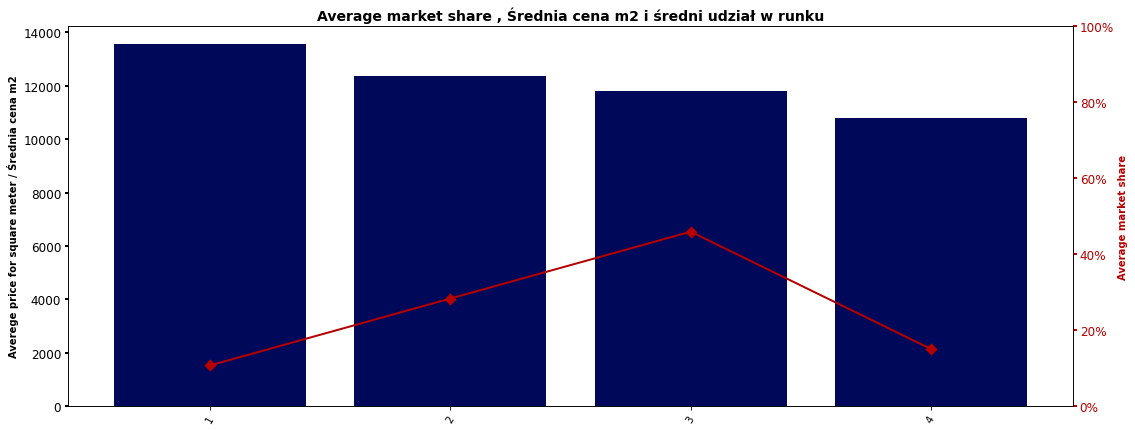

In [125]:
combo_visual(df_rooms)

In [74]:
#dropping deviationed data
# df_4.sort_values(by='price',ascending=False).head(10)
# test = df_4
# test = test.drop(test[test.index == 249].index).drop(test[test.index == 780].index)
# df_4 = test

In [128]:
df_city = df_concat.groupby(by=['city'])["square meter price"].agg(["mean","count"])  
df_city.columns = (["Average","Count"])
df_city['Avemshare'] = df_city.Count / total_count  #average market share - średni udział w rynku
df_city = df_city.loc[df_city['Count'] > 6]
df_city
df_concat['city'].unique()

array(['Płock', 'Warszawa,', 'Radom', 'Ząbki', 'Góra', 'Garwolin',
       'Milanówek', 'Wołomin', 'Konstancin-Jeziorna', 'Józefosław',
       'Siedlce', 'Legionowo', 'Piaseczno', 'Grodzisk', 'Sokołów',
       'Żyrardów', 'Piastów', 'Zamienie', 'Pruszków', 'Radzymin',
       'Nasielsk', 'Gostynin', 'Kobyłka', 'Ceranów', 'Ożarów', 'Zwoleń',
       'Jabłonna', 'Zegrze', 'Pionki', 'Warszawa', 'Sulejówek', 'Grójec',
       'Pass', 'Wróblewko', 'Ostrołęka', 'Kozienice', 'Radzików', 'Mińsk',
       'Pułtusk', 'Wyszków', 'Sochaczew', 'Michrów', 'Warka', 'Mława',
       'Nowy', 'Łomianki', 'Wieliszew', 'Iłża', 'Wielogóra', 'Otwock',
       'Ostrów', 'Płońsk', 'Ciechanów', 'Tarczyn', 'Marki', 'Błonie',
       'Popłacin', 'Sękocin', 'Józefów', 'Lipsko', 'Parzniew', 'Stromiec',
       'Duchnice', 'Brwinów', 'Ogorzelice', 'Przasnysz', 'Książenice',
       'Lubowidz', 'Rempin', 'Wola', 'Duczki', 'Sierpc', 'Szydłowiec',
       'Drobin', 'Małkinia', 'Mszczonów', 'Nowa', 'Zielonka', 'Przypki',
       '

In [15]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    1067 non-null   object 
 1   city     1067 non-null   object 
 2   price    1067 non-null   float64
 3   area     1067 non-null   float64
 4   rooms    1067 non-null   int64  
 5   cena m2  1067 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 58.4+ KB


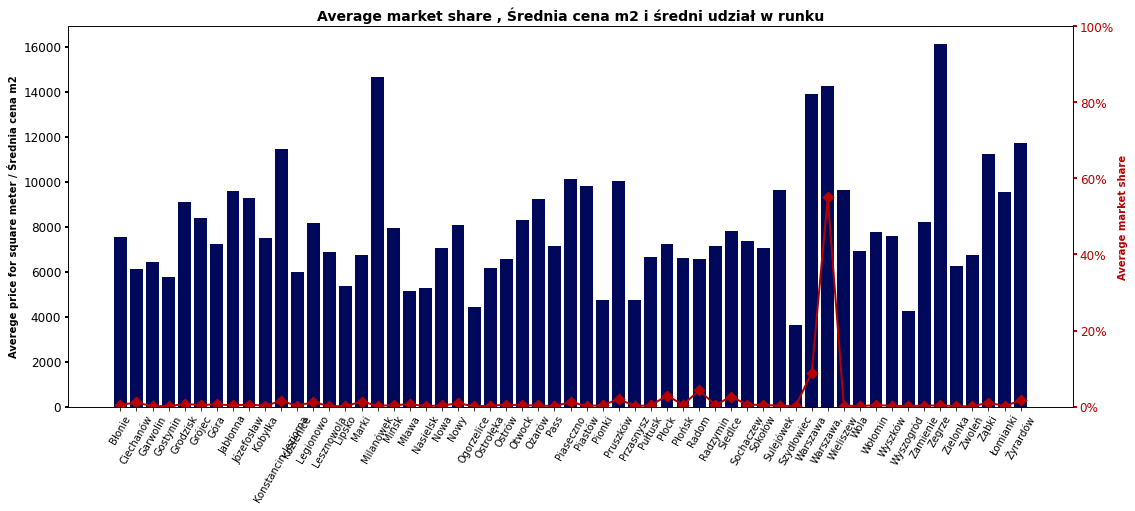

In [129]:
combo_visual(df_city)
#tylko miasta, w których było więcej niż 3 ogłoszenia

In [116]:
df_concat["city"]

array(['Płock', 'Warszawa,', 'Radom', 'Ząbki', 'Góra', 'Garwolin',
       'Milanówek', 'Wołomin', 'Konstancin-Jeziorna', 'Józefosław',
       'Siedlce', 'Legionowo', 'Piaseczno', 'Grodzisk', 'Sokołów',
       'Żyrardów', 'Piastów', 'Zamienie', 'Pruszków', 'Radzymin',
       'Nasielsk', 'Gostynin', 'Kobyłka', 'Ceranów', 'Ożarów', 'Zwoleń',
       'Jabłonna', 'Zegrze', 'Pionki', 'Warszawa', 'Sulejówek', 'Grójec',
       'Pass', 'Wróblewko', 'Ostrołęka', 'Kozienice', 'Radzików', 'Mińsk',
       'Pułtusk', 'Wyszków', 'Sochaczew', 'Michrów', 'Warka', 'Mława',
       'Nowy', 'Łomianki', 'Wieliszew', 'Iłża', 'Wielogóra', 'Otwock',
       'Ostrów', 'Płońsk', 'Ciechanów', 'Tarczyn', 'Marki', 'Błonie',
       'Popłacin', 'Sękocin', 'Józefów', 'Lipsko', 'Parzniew', 'Stromiec',
       'Duchnice', 'Brwinów', 'Ogorzelice', 'Przasnysz', 'Książenice',
       'Lubowidz', 'Rempin', 'Wola', 'Duczki', 'Sierpc', 'Szydłowiec',
       'Drobin', 'Małkinia', 'Mszczonów', 'Nowa', 'Zielonka', 'Przypki',
       '

In [ ]:
#Znaleźć dane o mieście Zamienie!!!!!!
#df_concat[]

,Średnia
rooms,
1,13568.245090
2,12351.033633
3,11785.397176
4,10803.382469


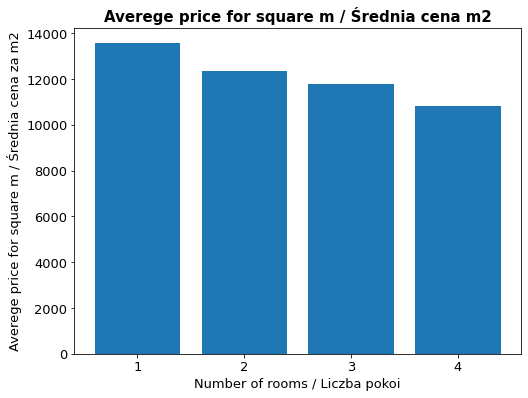

<Figure size 432x288 with 0 Axes>

In [130]:
plt.figure(figsize=(8,6))
df_chart = df_concat.groupby(by=['rooms'])["square meter price"].agg(["mean"])  
df_chart.columns = ["Średnia"]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Średnia']# wartości na osi y 

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.ylabel('Averege price for square m / Średnia cena za m2', fontsize = 13)
plt.xlabel('Number of rooms / Liczba pokoi', fontsize = 13)
plt.title('Averege price for square m / Średnia cena m2', fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()

df_chart

,Mean/Średnia
rooms,
1,3.946002e+05
2,4.729767e+05
3,5.511251e+05
4,1.095721e+06


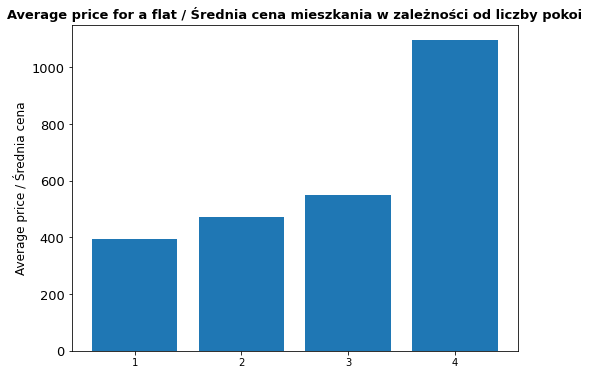

<Figure size 432x288 with 0 Axes>

In [120]:
plt.figure(figsize=(8,6))
df_chart = df_concat.groupby(by=['rooms'])["price"].agg(["mean"])  
df_chart.columns = ["Mean/Średnia"]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Mean/Średnia']/1000# wartości na osi y 
plt.yticks(fontsize = 13)
plt.ylabel('Average price / Średnia cena za mieszkanie', fontsize = 12)
plt.ylabel('Average price / Średnia cena', fontsize = 12)
plt.title('Average price for a flat / Średnia cena mieszkania w zależności od liczby pokoi', fontsize=13, fontweight='bold')
plt.bar(x, y)
plt.figure()

df_chart

<Figure size 432x288 with 0 Axes>

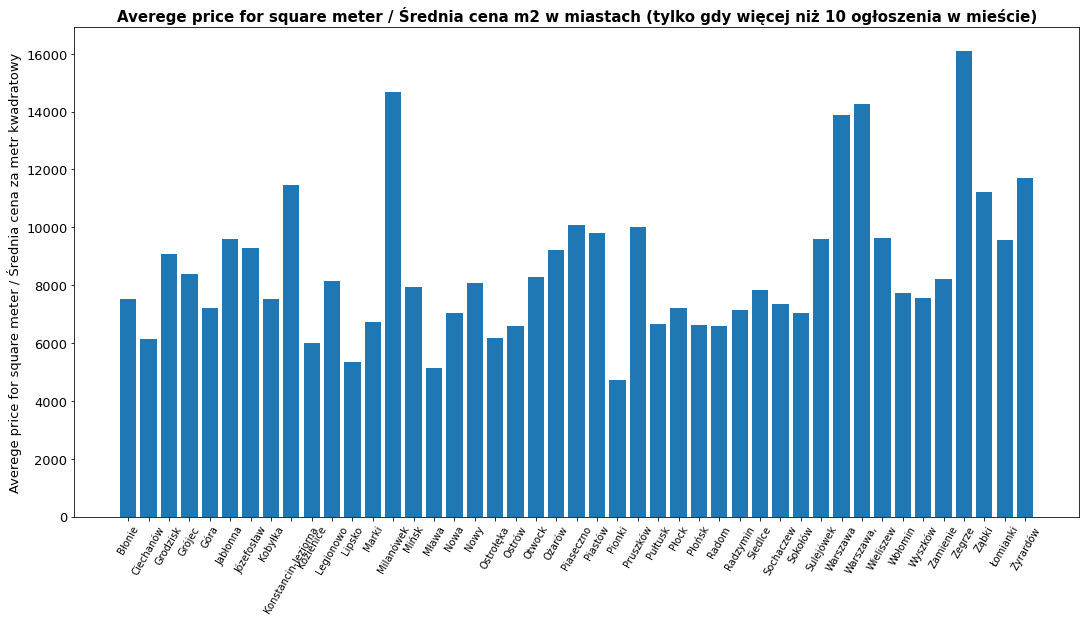

<Figure size 432x288 with 0 Axes>

In [133]:
plt.figure(figsize=(18,9))
df_chart = df_concat.groupby(by=['city'])["square meter price"].agg(["mean","count"])  
df_chart.columns = (["Średnia","Liczba"])
df_chart = df_chart.loc[df_chart['Liczba'] > 10]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Średnia']# wartości na osi y 
plt.xticks(rotation = 60)
plt.yticks(fontsize = 13)
plt.ylabel('Averege price for square meter / Średnia cena za metr kwadratowy', fontsize = 13)
plt.title("Averege price for square meter / Średnia cena m2 w miastach (tylko gdy więcej niż 10 ogłoszenia w mieście)", fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()

#df_chart

<AxesSubplot:xlabel='city'>

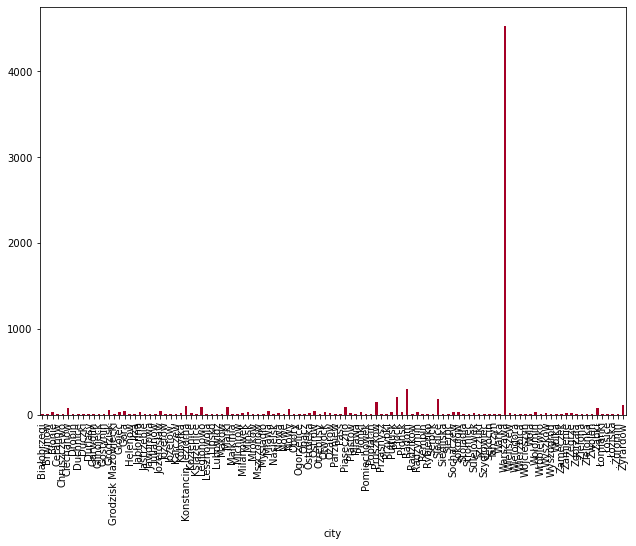

In [47]:
df_concat.groupby("city") \
    .count()["title"] \
    .plot.bar(figsize=(10.5, 7.5), cmap="RdYlGn")

<AxesSubplot:ylabel='city'>

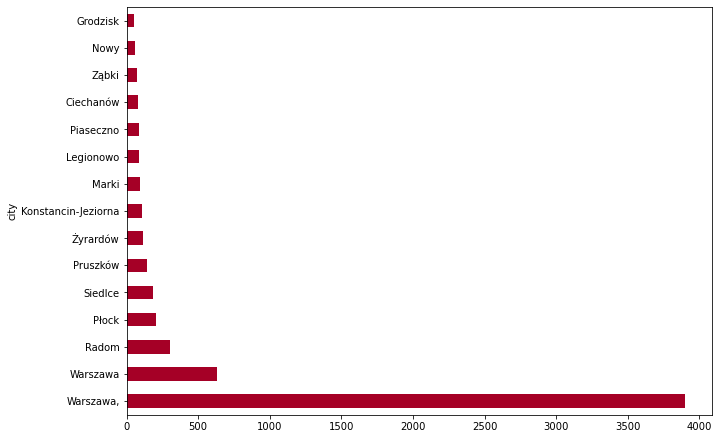

In [132]:
#ilość ogłoszeń dla poszczególnych miast
df_concat.groupby("city") \
    .count()["title"] \
    .sort_values(ascending=False) \
    .head(n=15) \
    .plot.barh(figsize=(10.5, 7.5), cmap="RdYlGn")#.title("dddd")

In [40]:
#df_concat['rooms']
#wypisać dane z 4 pokojami
#df_concat.loc[df_concat['rooms'] == 4, 'rooms','cena m2']

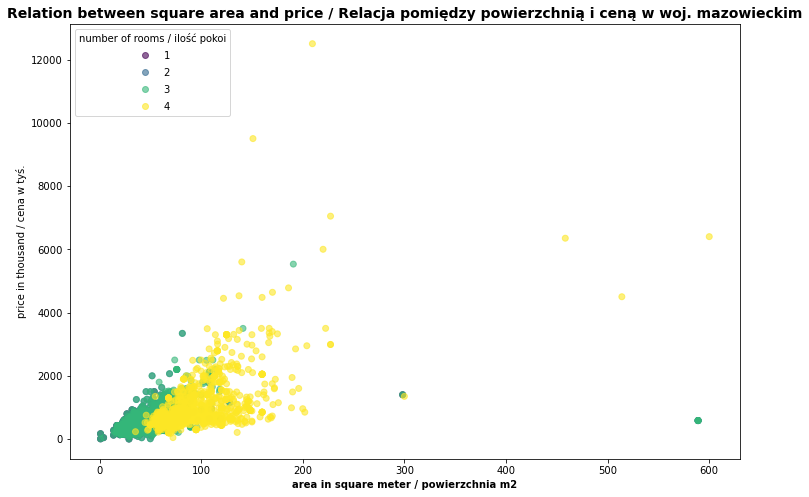

In [49]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(df_concat['area'],
            df_concat['price']/1000, 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            c = df_concat['rooms'], # additional third feature
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "number of rooms / ilość pokoi")
plt.title("Relation between square area and price / Relacja pomiędzy powierzchnią i ceną w woj. mazowieckim", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("area in square meter / powierzchnia m2", weight = "bold")
plt.ylabel("price in thousand / cena w tyś.")
plt.show()

In [50]:
df_4.sort_values(by='price',ascending=False).head(10)
test = df_4
test = test.drop(test[test.index == 249].index).drop(test[test.index == 780].index)
#est = test.drop(test[test.index == 780].index)
test.sort_values(by='price',ascending=False).head(10)
#df_4.drop(df_4[df_4[249]], inplace=True)
#df.drop(df[df.score < 50].index, inplace=True)
test.describe()
test.sort_values(by='price',ascending=False).head(10)

,title,city,price,area,rooms,cena m2
291,"ZŁOTA 44 Wysokie piętro, ponad 200mkw, 3 sypia...",Warszawa,12500000.0,209.50,4,59665.871122
887,Złota 44 151 m2! 3 sypialnie! W pełni umeblowany!,Warszawa,9500000.0,151.00,4,62913.907285
550,Gotowy penthouse z prywatnym tarasem na dachu,Warszawa,7047230.0,227.33,4,31000.000000
554,"Inwestycja, gwarancja wynajmu, wysoka stopa zw...",Warszawa,6400000.0,600.00,4,10666.666667
370,"Kamienica 458m2, 15 mieszkań, Praga Płd. Grochów",Warszawa,6350000.0,458.34,4,13854.343937
864,Butikowy hotel na Krakowskim Przedmieściu,Warszawa,6000000.0,220.00,4,27272.727273
32,Bezpośrednio NOWE mieszkanie z widokiem na Wisłę,Warszawa,5600000.0,140.00,4,40000.000000
915,186 m2 na Starym Żoliborzu,Warszawa,4780000.0,186.00,4,25698.924731
664,"Apartament w pięknej kamienicy, 170m2, SZPITALNA",Warszawa,4640000.0,170.18,4,27265.248560
551,Penthouse z własnym tarasem i widokiem na centrum,Warszawa,4530240.0,137.28,4,33000.000000


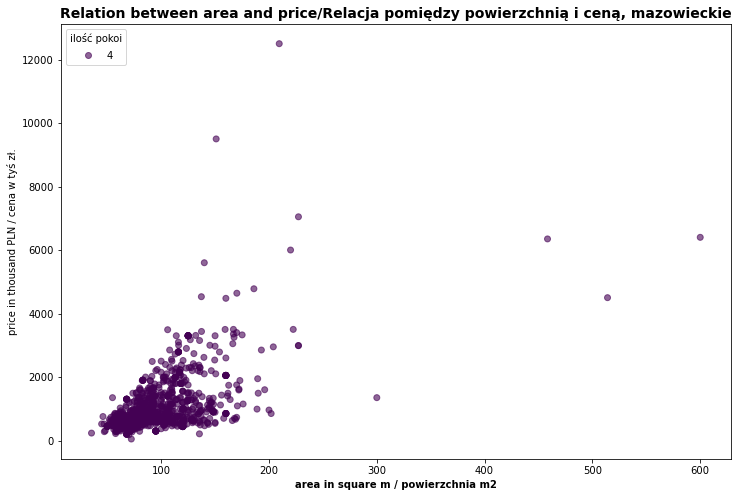

In [20]:
price_area_scatter(test)

In [51]:
df_concat.corr(method="spearman").style.background_gradient(cmap="coolwarm")

,price,area,rooms,cena m2
price,1.000000,0.647514,0.412620,0.496057
area,0.647514,1.000000,0.640371,-0.262338
rooms,0.412620,0.640371,1.000000,-0.175497
cena m2,0.496057,-0.262338,-0.175497,1.000000


<AxesSubplot:xlabel='area', ylabel='square meter price'>

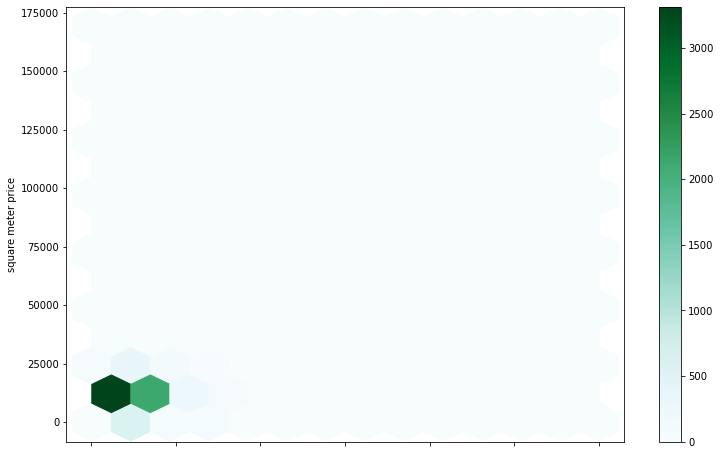

In [135]:
#Stosunek ceny m2 do powierzchni mieszkania
df_concat.plot.hexbin(x="area", y="square meter price", 
                    figsize=(12.5, 8.0), gridsize=(13, 7))

In [154]:
#grupowanie według wybranej kolumny, wykonanie funkcji agregujących na tej grupie dla pola cena m2
def analyse_column(column_name,df):
    result = df.groupby(by=[column_name])["square meter price"].agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
            #lambda x: sum(1-x),   # liczba kart, które zostały dezaktywowane (0), czyli 1-1=0, czyli aktywnych nie wliczamy
            #lambda x: sum(1-x)/len(x) - 0.16  # odchylenie od średniej globalnej
        ]).sort_values(["mean"], ascending=False)
   #df.loc[df['column_name'] == some_value]
    # nadanie tabeli opisowych nazw kolumn
    # ponieważ po tym kroku byłyby dostępne następujące:
    # mean, count, <lambda_0>, <lambda_1>, które nic nie opisują
    result.columns = [
        "Average",
        "Number"
    ]
    result = result.loc[result['Number'] > 10] #wybieramy miasta, gdzie były więcej niż 4 ogłoszenia
    #result['Średnia'].sort_values(ascending=False)
    return result

In [155]:
def visualize_analysis(df, compare_value):
    plt.figure(figsize=(21,9))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Average"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("City")  # dodanie legendy dla osi x
    plt.ylabel("Average price for squared meter")  # dodanie legendy dla osi y
    plt.title("Average price per city")  # nadanie tytułu dla wykresu
    plt.xticks(rotation = 75)

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()

In [156]:
city_analysis = analyse_column("city",df_concat)
city_analysis

,Average,Number
city,,
Zegrze,16104.746485,23
Milanówek,14660.979867,18
"Warszawa,",14259.061381,3896
Warszawa,13875.420777,630
Żyrardów,11702.634396,115
Konstancin-Jeziorna,11465.080134,105
Ząbki,11204.608703,74
Piaseczno,10094.040663,84
Pruszków,10025.421217,141


In [150]:
global_mean = df_concat["square meter price"].mean()  # określenie globalnej ceny za m2 (średniej)
global_mean

11989.152193993294

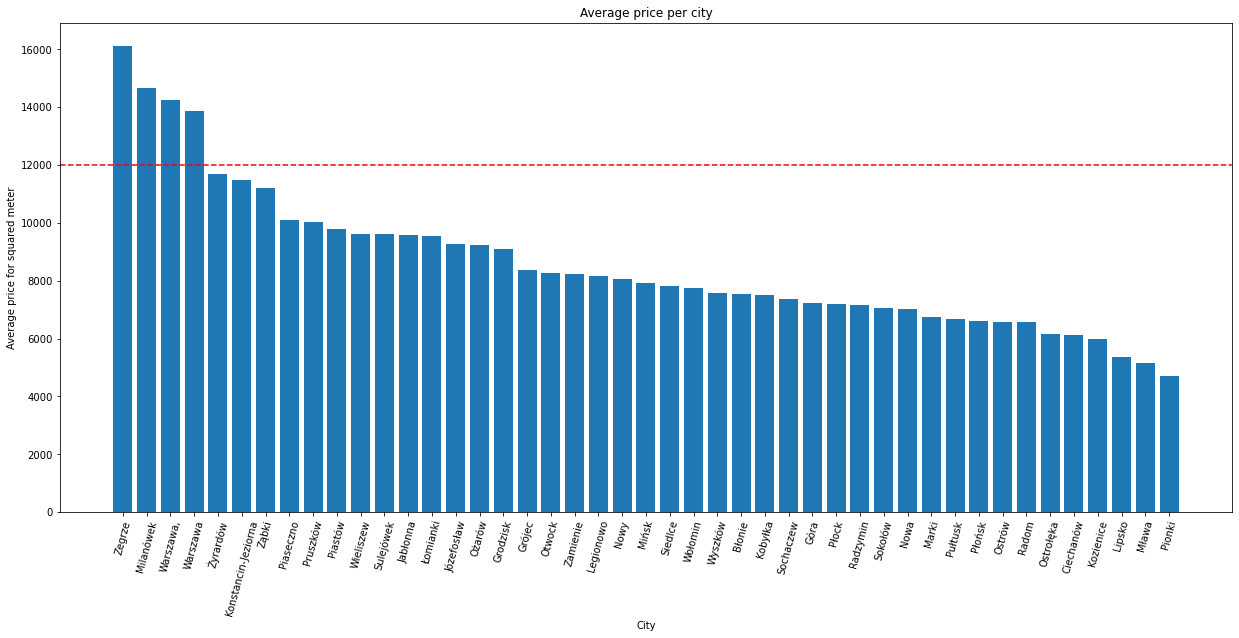

In [157]:
visualize_analysis(city_analysis, global_mean)

In [158]:
import string

In [159]:
df_concat["title"].map(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)

0       Rezerwacja Sprzedam kawalerkę ul Miodowa 23 pi...
1          kawalerka ul Piękna  pl Konstytucji Mokotowska
2       Bezpośrednio Apartament 364m2 2009rok Metro Wi...
3          Gotowe Najwyższe piętro  Garaż  Metro  Bez PCC
4        Wyjątkowe studio z tarasem na dachuGotowebez PCC
                              ...                        
1062    Nowoczesny DomBezczynszowyPodwyższony Standard...
1063      GOTOWE 71m2 z garażem i boksem w cenie  bez PCC
1064    Apartament 12438M2 z ogrodem 230 m2   WARSZAWA...
1065    Mieszkanie Warszawa Wawer Trakt Lubelski stan ...
1066    Mieszkanie 78 m2 Prywatnie Podolszyce Północ Z...
Name: title, Length: 7085, dtype: object

In [160]:
words = df_concat["title"].map(
    lambda x: x \
        .translate(str.maketrans("", "", string.punctuation))
        .lower()
        .split()) \
    .explode() \
    .reset_index(drop=True)
words

0        rezerwacja
1          sprzedam
2         kawalerkę
3                ul
4           miodowa
            ...    
42395     prywatnie
42396    podolszyce
42397        północ
42398       zielony
42399           jar
Name: title, Length: 42400, dtype: object

In [161]:
words.value_counts() \
    .sort_values(ascending=False) \
    .head(n=10)

mieszkanie    2654
na            1117
pokoje        1054
kawalerka     1050
z              956
2              936
w              918
m2             785
sprzedam       759
ul             590
Name: title, dtype: int64

In [164]:
import wordcloud

In [182]:
word_counts = words.value_counts()
word_counts \
    .sort_values(ascending=False) \
    .head(n=10)

mieszkanie    2654
na            1117
pokoje        1054
kawalerka     1050
z              956
2              936
w              918
m2             785
sprzedam       759
ul             590
Name: title, dtype: int64

In [183]:
word_counts = word_counts[
    (word_counts.index.str.len() > 4) &
    (word_counts >= 20)
]

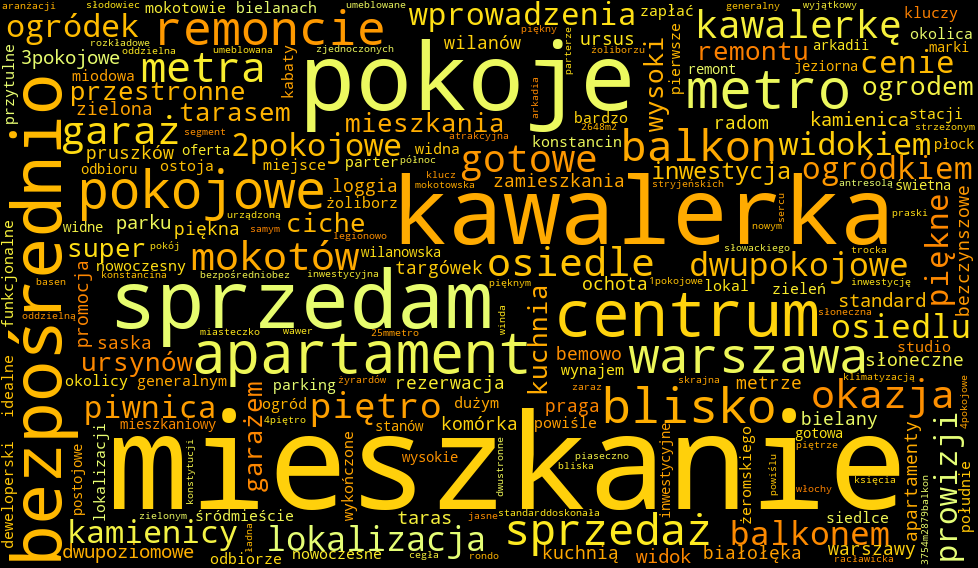

In [185]:
word_cloud = wordcloud.WordCloud(width=978, height=568,    #width=1024, height=768, 
                                 colormap="Wistia") \
    .fit_words(dict(zip(word_counts.index, 
                        word_counts.tolist())))
word_cloud.to_image()